### Example 6.1: Temperature Dependence of Magnetization. 

The magnetization of $N$ spin-1/2 particles, each with magnetic moment $\mu$ at a temperature $T$, in an external magnetic field $B$ is given by:

$m(t) = \tanh\left(\frac{ m(t) }{ t } \right)$,

where $m(t)$ is the "reduced" magnetization and $t$ is the "reduced" temperature.                                  

[For the sake of completeness: $m(T) = M(T)/(N\mu)$, with $M$ being the magnetization, $t=T/T_c$, with $T$ being the temperaturem, and $T_c = N \mu^2 \lambda / k_B$ the Curie temperature.]

Our goal is to find the reduced magnetization $m$, for various reduced temperatures: $t=0.5, 1.0, 2.0$. We will use the bisection method to solve the *transcendetal* equation for $m(t)$. 

We should start by plotting the function that we wish to find the zero of, i.e. $f(m) = \tanh(m/t) - m$, to get an indication of the location of the zeros. It will be clear that there are no zeros for some of the values. For those that there will be zeros, let's find the solution to a precision of $\mathcal{O}(10^{-10})$. Let's also print the number of iterations necessary to achieve this. 

In [4]:
# Start by defining the function, in the form f(m) = 0:
import numpy as np
import math

def f(m,t):
    """Transcendental equation for the reduced magnetization at reduced temperature t"""
    return np.tanh(m/t) - m

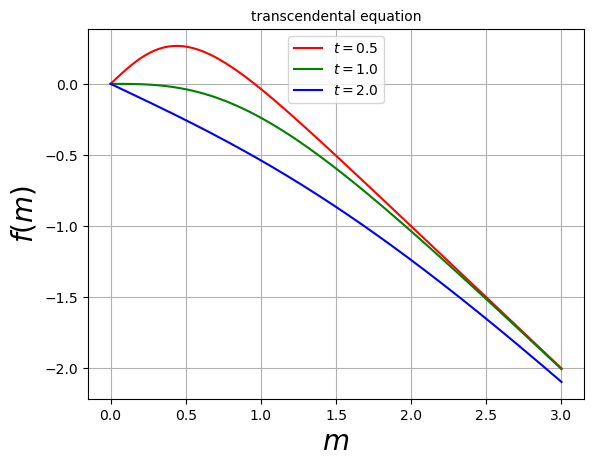

In [5]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

# Now plot! Don't forget the different labels! 
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$m$', fontsize=20) # set the x label
ax.set_ylabel(r'$f(m)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title(r'transcendental equation', fontsize=10) # set the title 

# construct the variable: 
m = np.linspace(0,3,300)

# calculate f(m,t) at t=0.5, 1.0, 2.0
tvals = [0.5, 1.0, 2.0]
fvals = [f(m,t) for t in tvals] # note that fvals will be a list of numpy arrays at this point

# make a one-dimensional plot for each value of t
colors = ['red', 'green', 'blue']
linestyles = ['-','--','-.']
for i,t in enumerate(tvals):
    ax.plot(m, fvals[i], label=r'$t=' + str(t) + '$', ls='-', color=colors[i])
    
# construct the legend:
ax.legend(loc='upper center')  # Add a legend

ax.grid() # show the grid. 

plt.show() # show the plot here


It's clear from the above, that there are no solutions for $t=1.0, 2.0$! 

Let's find the solution for $t=0.5$ using bisection.

We begin by implementing the bisection algorithm. Don't forget to include a maximum for the number of steps taken, and the required precision.

In [17]:
# The bisection algorithm: 
# func should be a function for which we are trying to find the solution, in the form f(x)=0
# xmin and xmax should enclose the root (the function must change signs from xmin to xmax)
# Nmax is the number of evaluations
# prec is the required precision
def bisection(func, xmin, xmax, Nmax, prec): 
    """Function that implements the bisection algorithm for root finding"""
    n = 0 # number of steps taken
    val = 1E99 # the value of the equation, initialize to a large number
    root = math.nan # initialize the root to "not a number"
    while abs(val) > prec and n < Nmax: # loop terminates either when the max number of evals is reached or the precision is reached
        # get the equation values at the edges [xmin, xmax], 
        # and at the bisection point: 
        val = func((xmin+xmax)/2)
        valmax = func(xmax)
        valmin = func(xmin)
        # figure out in which of the two intervals there's a sign change:
        if val * valmax < 0: # sign change between bisection-xmax, set minimum to bisection
            xmin = (xmin+xmax)/2
        elif val * valmin < 0: # sign change between xmin-bisection, set max to bisection
            xmax = (xmin+xmax)/2
        n = n + 1
    if n > Nmax-1:
        print("Warning: maximum number of evaluations exceeded:", Nmax)
    root = (xmin+xmax)/2
    return root, n

Let's now try to find the root of the function for t=0.5. It should lie between $m\in [0.5, 1.5]$, so let's start with these values as our initial interval. 

In [19]:

# let's try it out on the function with t=0.5
# we can use a partial function to fix the parameter:
# See chapter 4 for more details
from functools import partial # partial functions allow us to fix a certain number of arguments of a function and generate a new function.
ft05 = partial(f, t=0.5) # this has created a new function with the parameter t fixed

# launch the bisection in [0.5, 1.5] for a precision of 1E-6 and 1000 maximum evals:
maxiterations = 40
xmin = 0.5
xmax = 1.5
precision = 1E-10
m05, niter = bisection(ft05, xmin, xmax, maxiterations, precision)

print("Root for t=0.5 using bisection:", m05, 'after', niter,'iterations')


Root for t=0.5 using bisection: 0.957504024147056 after 32 iterations
